# 딥러닝 쌩~으로 이해하기

## 학습절차
$z = W^T x + b$

![image](https://user-images.githubusercontent.com/118172599/235068254-6fe117d7-5924-45c7-9bc6-13b65633ec63.png)


In [42]:
import numpy as np

In [43]:
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1],
])

In [85]:
def Sigmoid(x):
    return 1./(1. + np.exp(-x))

#### 활성화 함수의 종류
![image](https://user-images.githubusercontent.com/118172599/235061319-27c875c0-9446-4764-ad4c-e23ea2f876bb.png)


#### 가중치 생성

In [45]:
# np.random.random의 range(0,1)이므로 -1~1로 만듦
W = 2 * np.random.random((1, 3)) - 1
W

array([[-0.69587368,  0.22372543, -0.26202276]])

#### raw_weights로 추론

In [46]:
N = 4
for k in range(N):
    x = X[k, :].T
    v = np.matmul(W, x)
    y = Sigmoid(v)
    
    print(y)

[0.43486653]
[0.49042684]
[0.27729956]
[0.3242801]


## 가중치 업데이트 하기

In [47]:
X = np.array([  # features_data
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1],
])

D = np.array([[0], [0], [1], [1]])    # label_data

In [48]:
def calc_output(W, x):
    v = np.matmul(W, x)
    y = Sigmoid(v)
    
    return y

In [49]:
# d : true_label_data
# y : pred_label_data
# d/dx(Sigmoid) = sig(1-sig)
def calc_error(d, y):
    e = d - y
    delta = y*(1-y) * e
    
    return delta

In [50]:
def delta_GD(W, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]
        
        y = calc_output(W, x)
        delta = calc_error(d, y)
        
        dW = alpha*delta*x
        W = W + dW
        
    return W

#### 모델학습

In [51]:
W = 2*np.random.random((1, 3)) - 1
alpha = 0.9
for epoch in range(10000):
    W = delta_GD(W, X, D, alpha)
    print(W)

[[ 0.26793891 -0.58857304  0.33312009]]
[[ 0.47429761 -0.55793964  0.32402775]]
[[ 0.65618083 -0.53973048  0.28925323]]
[[ 0.81857166 -0.52989744  0.23724011]]
[[ 0.96596127 -0.52490288  0.17497661]]
[[ 1.10163169 -0.52227342  0.10742194]]
[[ 1.22782708 -0.52048107  0.03785699]]
[[ 1.34607093 -0.5186757  -0.03163937]]
[[ 1.45742324 -0.51644456 -0.0998001 ]]
[[ 1.56265412 -0.51363616 -0.16588972]]
[[ 1.66235287 -0.51024334 -0.22951371]]
[[ 1.75699419 -0.50633066 -0.29049271]]
[[ 1.84697752 -0.50199174 -0.34878101]]
[[ 1.93265044 -0.4973258  -0.40441433]]
[[ 2.01432242 -0.49242576 -0.45747642]]
[[ 2.09227315 -0.48737301 -0.50807801]]
[[ 2.16675773 -0.48223593 -0.5563434 ]]
[[ 2.23801009 -0.47707025 -0.60240199]]
[[ 2.30624533 -0.47192037 -0.64638309]]
[[ 2.3716616  -0.4668209  -0.68841265]]
[[ 2.43444154 -0.46179826 -0.72861139]]
[[ 2.49475362 -0.45687217 -0.76709374]]
[[ 2.55275327 -0.45205691 -0.80396739]]
[[ 2.60858393 -0.44736242 -0.8393331 ]]
[[ 2.66237803 -0.44279519 -0.87328487]]


#### 결과확인

In [52]:
N = 4
print("Pred\t\tLabel")
for k in range(N):
    x = X[k, :].T
    v = np.matmul(W, x)
    y = Sigmoid(v)
    d = D[k]
    
    print(f"{y}\t{d}")

Pred		Label
[0.01020237]	[0]
[0.00829357]	[0]
[0.993243]	[1]
[0.99168488]	[1]


# XOR

In [53]:
X = np.array([  # features_data
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1],
])

D = np.array([[0], [1], [1], [0]])    # label_data

W = 2*np.random.random((1,3)) - 1   # weights

# train
alpha = 0.9
for epoch in range(10000):
    W = delta_GD(W, X, D, alpha)
    
# test
N = 4
print("Pred\t\tLabel")
for k in range(N):
    x = X[k, :].T
    v = np.matmul(W, x)
    y = Sigmoid(v)
    d = D[k]
    
    print(f"{y}\t{d}")

Pred		Label
[0.52965337]	[0]
[0.5]	[1]
[0.47034663]	[1]
[0.44090112]	[0]


## 딥러닝의 역사

초기 딥러닝은 XOR문제를 해결할 수 없어서 암흑기에 빠짐

![image](https://user-images.githubusercontent.com/118172599/235082595-521a051b-c1d8-496b-a1fa-284fd78e5043.png)


XOR 극복을 하려면 다층신경망을 사용하면 된다는 것을 알고 있었으나,

다층 신경망에서 오차를 계산할 수 없었다
![image](https://user-images.githubusercontent.com/118172599/235083322-50b086ef-c84b-41d0-99ab-dac42a9deafe.png)


## 역전파
- 출력층부터 delta를 계산해서 은닉층으로 전달한다

![image](https://user-images.githubusercontent.com/118172599/235083616-3db80184-8045-4d27-85bb-1dd151a37099.png)


## 모델 재구성
![image](https://user-images.githubusercontent.com/118172599/235083895-41896508-550f-42b2-a559-eb6560f363d9.png)


#### Output 계산

In [54]:
def calc_output(W1, W2, x):
    v1 = np.matmul(W1, x)
    y1 = Sigmoid(v1)
    v = np.matmul(W2, y1)
    y = Sigmoid(v)
    
    return y, y1

#### 출력층의 델타 계산

In [55]:
def calc_delta(d, y):
    e = d - y
    delta = y*(1-y)*e
    
    return delta

#### 은닉층의 델타 계산
![image](https://user-images.githubusercontent.com/118172599/235084703-34047b84-e385-470c-a9a8-1431fa76bac0.png)


In [56]:
def calc_delta1(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1*(1-y1) * e1
    
    return delta1

#### 활성화 함수들의 미분값
![image](https://user-images.githubusercontent.com/118172599/235084826-d9c52ca5-b9d4-44c9-b205-cece72422554.png)


#### 역전파

In [57]:
def backprop_XOR(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]
        
        y, y1 = calc_output(W1, W2, x)
        delta = calc_delta(d, y)
        delta1 = calc_delta1(W2, delta, y1)
        
        dW1 = (alpha*delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1
        
        dW2 = alpha * delta * y1
        W2 = W2 + dW2
        
    return W1, W2

#### 역전파 모델 생성

In [58]:
# features_data
X = np.array([  
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1],
])

# label_data
D = np.array([[0], [1], [1], [0]])    

# weights
W1 = 2*np.random.random((4, 3)) - 1   
W2 = 2*np.random.random((1, 4)) - 1

# train
alpha = 0.9
for epoch in range(10000):
    W1, W2 = backprop_XOR(W1, W2, X, D, alpha)
    
# test
N = 4
print("Pred\t\tLabel")
for k in range(N):
    x = X[k, :].T
    v1 = np.matmul(W1, x)
    y1 = Sigmoid(v1)
    v = np.matmul(W2, y1)
    y = Sigmoid(v)
    d = D[k]
    
    print(f"{y}\t{d}")

Pred		Label
[0.00756898]	[0]
[0.98994333]	[1]
[0.98986829]	[1]
[0.01421657]	[0]


## Loss

![image](https://user-images.githubusercontent.com/118172599/235086904-44ed09cc-1837-4ef2-8c82-f2b405f77c79.png)


![image](https://velog.velcdn.com/images/insung_na/post/1773353a-527b-4ec6-9b88-8ac38e3f7508/image.png)

In [59]:
def calcDelta_ce(d, y):
    e = d - y
    delta = e
    
    return delta

In [60]:
def calcDelta1_ce(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1*(1-y1) * e1
    
    return delta1

In [61]:
def BackpropCE(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]
        
        y, y1 = calc_output(W1, W2, x)
        delta = calcDelta_ce(d, y)
        delta1 = calcDelta1_ce(W2, delta, y1)
        
        dW1 = (alpha*delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1
        
        dW2 = alpha * delta * y1
        W2 = W2 + dW2
        
    return W1, W2

#### 역전파, loss=cross_entropy 모델학습

In [62]:
# features
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1],
])

# label
D = np.array([[0], [1], [1], [0]])

# weights
W1 = 2*np.random.random((4, 3)) - 1   
W2 = 2*np.random.random((1, 4)) - 1

# train
for epoch in range(5000):
    W1, W2 = BackpropCE(W1, W2, X, D, alpha=0.9)
    
# test
N = 4
print("Pred\t\tLabel")
for k in range(N):
    x = X[k, :].T
    v1 = np.matmul(W1, x)
    y1 = Sigmoid(v1)
    v = np.matmul(W2, y1)
    y = Sigmoid(v)
    d = D[k]
    
    print(f"{y}\t{d}")

Pred		Label
[7.64196953e-05]	[0]
[0.99932061]	[1]
[0.99976409]	[1]
[0.00106609]	[0]


# 2. example
- 숫자 맞추기

![image](https://user-images.githubusercontent.com/118172599/235105250-de7a59de-7b6a-4b40-8f53-4f900d14bd03.png)


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

#### Softmax

In [79]:
def Softmax(x):
    x = np.subtract(x, np.max(x)) # prevent overflow
    ex = np.exp(x)
    
    return ex / np.sum(ex)

#### 훈련용 데이터

In [65]:
X = np.zeros((5,5,5))

X[:, :, 0] = [ 
              [0,1,1,0,0], 
              [0,0,1,0,0],
              [0,0,1,0,0],
              [0,0,1,0,0],
              [0,1,1,1,0] ]

X[:, :, 1] = [ 
              [1,1,1,1,0], 
              [0,0,0,0,1],
              [0,1,1,1,0],
              [1,0,0,0,0],
              [1,1,1,1,1] ]

X[:, :, 2] = [ 
              [1,1,1,1,0], 
              [0,0,0,0,1],
              [0,1,1,1,0],
              [0,0,0,0,1],
              [1,1,1,1,0] ]

X[:, :, 3] = [ 
              [0,0,0,1,0], 
              [0,0,1,1,0],
              [0,1,0,1,0],
              [1,1,1,1,1],
              [0,0,0,1,0] ]

X[:, :, 4] = [ 
              [1,1,1,1,1], 
              [1,0,0,0,0],
              [1,1,1,1,0],
              [0,0,0,0,1],
              [1,1,1,1,0] ]

D = np.array([
    [[1,0,0,0,0]],
    [[0,1,0,0,0]],
    [[0,0,1,0,0]],
    [[0,0,0,1,0]],
    [[0,0,0,0,1]],
])

#### 훈련용 데이터 확인

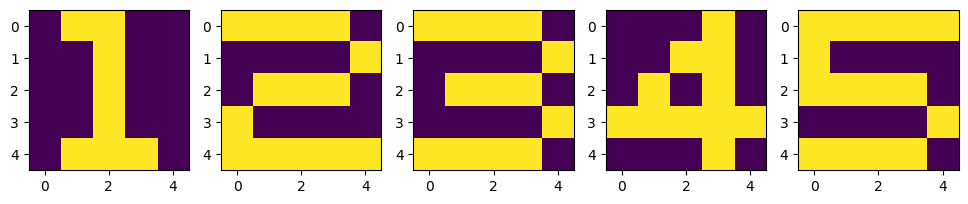

In [66]:
plt.figure(figsize=(12, 4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X[:,:,n])
plt.show()

### ReLU

In [67]:
def ReLU(x):
    return np.maximum(0,x)

#### 정방향 계산

In [68]:
def calcOutput_ReLU(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    v = np.matmul(W4, y3)
    y = Softmax(v)
    
    return y, v1, v2, v3, y1, y2, y3

#### 역방향 계산

In [69]:
def backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e
    
    e3 = np.matmul(W4.T, delta)
    delta3 = (v3 > 0) * e3
    
    e2 = np.matmul(W3.T, delta3)
    delta2 = (v2 > 0) * e2
    
    e1 = np.matmul(W2.T, delta2)
    delta1 = (v1 > 0) * e1
    
    return delta, delta1, delta2, delta3

#### 가중치 계산

In [70]:
def calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4):
    dW4 = alpha * delta * y3.T
    W4 = W4 + dW4
    
    dW3 = alpha * delta3 * y2.T
    W3 = W3 + dW3
    
    dW2 = alpha * delta2 * y1.T
    W2 = W2 + dW2
    
    dW1 = alpha * delta1 * x.T
    W1 = W1 + dW1
    
    return W1, W2, W3, W4

#### 가중치 업데이트

In [71]:
def DeepReLU(W1, W2, W3, W4, X, D, alpha):
    for k in range(5):
        x = np.reshape(X[:, :, k], (25, 1))
        d = D[k, :].T
        
        y, v1, v2, v3, y1, y2, y3 = calcOutput_ReLU(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)
    
    return W1, W2, W3, W4

#### 모델 학습

In [72]:
W1 = 2*np.random.random((20, 25))-1
W2 = 2*np.random.random((20, 20))-1
W3 = 2*np.random.random((20, 20))-1
W4 = 2*np.random.random((5, 20))-1

alpha = 0.01
for epoch in tqdm(range(10000)):
    W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

100%|██████████| 10000/10000 [00:04<00:00, 2103.66it/s]


#### 훈련데이터 검증

In [73]:
def verify_algorithm(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1) 
    
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2) 
    
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3) 
    
    v = np.matmul(W4, y3)
    y = Softmax(v)
    
    return y  

In [74]:
N = 5
for k in range(N):
    x = np.reshape(X[:, :, k], (25,1))
    
    y = verify_algorithm(x, W1, W2, W3, W4)
    
    print("Y={}:".format(k+1))
    print(np.argmax(y, axis=0)+1)
    print(y)
    print("-"*30)

Y=1:
[1]
[[9.99985781e-01]
 [3.29453652e-07]
 [8.55703081e-06]
 [5.26350210e-06]
 [6.91014050e-08]]
------------------------------
Y=2:
[2]
[[4.52457064e-07]
 [9.99955743e-01]
 [1.01007071e-06]
 [1.10620990e-05]
 [3.17318761e-05]]
------------------------------
Y=3:
[3]
[[6.32634142e-06]
 [8.85408903e-06]
 [9.99971751e-01]
 [8.76826674e-09]
 [1.30593499e-05]]
------------------------------
Y=4:
[4]
[[1.22508750e-05]
 [6.70278920e-06]
 [5.40146785e-17]
 [9.99981046e-01]
 [7.87918309e-17]]
------------------------------
Y=5:
[5]
[[2.90763346e-06]
 [1.54421358e-05]
 [1.50301397e-05]
 [1.36885820e-07]
 [9.99966483e-01]]
------------------------------


#### 테스트 데이터 만들기

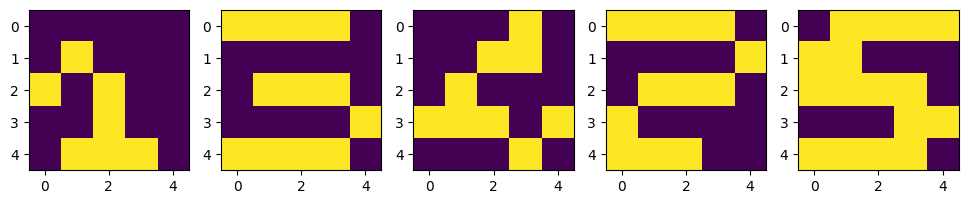

In [75]:
X_test = np.zeros((5,5,5))

X_test[:, :, 0] = [ 
              [0,0,0,0,0], 
              [0,1,0,0,0], 
              [1,0,1,0,0], 
              [0,0,1,0,0], 
              [0,1,1,1,0], 
               ]

X_test[:, :, 1] = [ 
              [1,1,1,1,0], 
              [0,0,0,0,0], 
              [0,1,1,1,0], 
              [0,0,0,0,1], 
              [1,1,1,1,0], ]

X_test[:, :, 2] = [ 
              [0,0,0,1,0], 
              [0,0,1,1,0], 
              [0,1,0,0,0], 
              [1,1,1,0,1], 
              [0,0,0,1,0], ]

X_test[:, :, 3] = [ 
              [1,1,1,1,0], 
              [0,0,0,0,1], 
              [0,1,1,1,0], 
              [1,0,0,0,0], 
              [1,1,1,0,0], ]

X_test[:, :, 4] = [ 
              [0,1,1,1,1], 
              [1,1,0,0,0], 
              [1,1,1,1,0], 
              [0,0,0,1,1], 
              [1,1,1,1,0], ]

plt.figure(figsize=(12, 4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X_test[:,:,n])
plt.show()

#### 검증

In [76]:
learning_result=[0,0,0,0,0]
N = 5
for k in range(N):
    x = np.reshape(X_test[:, :, k], (25,1))
    
    y = verify_algorithm(x, W1, W2, W3, W4)
    
    learning_result[k] = np.argmax(y, axis=0)+1
    
    print("Y={}:".format(k+1))
    print(np.argmax(y, axis=0)+1)
    print(y)
    print("-"*30)

Y=1:
[3]
[[3.55606378e-03]
 [1.14462099e-08]
 [9.96426511e-01]
 [4.79769758e-07]
 [1.69341616e-05]]
------------------------------
Y=2:
[2]
[[2.17617067e-03]
 [8.52679791e-01]
 [1.42224734e-01]
 [2.35299771e-03]
 [5.66306095e-04]]
------------------------------
Y=3:
[4]
[[1.22367109e-03]
 [7.64861907e-08]
 [3.88275844e-16]
 [9.98776252e-01]
 [3.17029816e-19]]
------------------------------
Y=4:
[2]
[[8.39308439e-06]
 [9.98624484e-01]
 [7.29866510e-04]
 [1.77336708e-05]
 [6.19522783e-04]]
------------------------------
Y=5:
[5]
[[3.66674407e-02]
 [1.78828888e-04]
 [4.83289539e-02]
 [2.14844348e-03]
 [9.12676333e-01]]
------------------------------


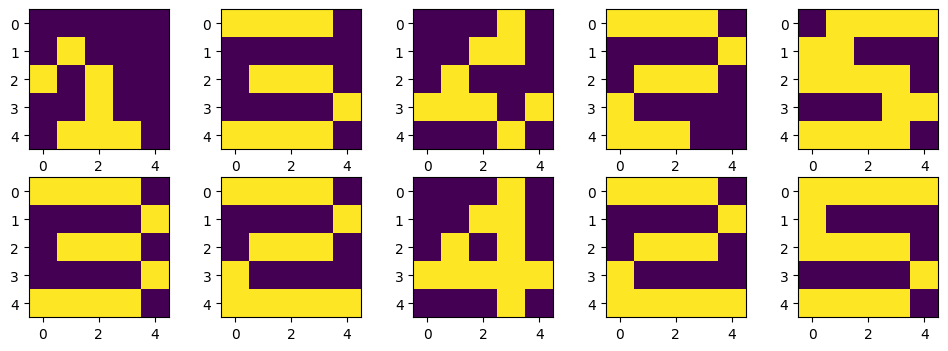

In [77]:
plt.figure(figsize=(12, 4))

for n in range(5):
    plt.subplot(2, 5, n+1)
    plt.imshow(X_test[:,:,n])
    plt.subplot(2, 5, n+6)
    plt.imshow(X[:,:, learning_result[n][0]-1])
    
plt.show()

## dropout

In [78]:
def Dropout(y, ratio):
    ym = np.zeros_like(y)
    
    num = round(y.size*(1-ratio))
    idx = np.random.choice(y.size, num, replace=False)
    ym[idx] = 1./(1.-ratio)
    
    return ym

In [92]:
def calcOutput_Dropout(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = Sigmoid(v1)
    y1 = y1 * Dropout(y1, 0.2)
    
    v2 = np.matmul(W2, y1)
    y2 = Sigmoid(v2)
    y2 = y2 * Dropout(y2, 0.2)
    
    v3 = np.matmul(W3, y2)
    y3 = Sigmoid(v3)
    y3 = y3 * Dropout(y3, 0.2)
    
    v = np.matmul(W4, y3)
    y = Softmax(v)
    
    return y, y1, y2, y3, v1, v2, v3

In [93]:
def backpropagation_Dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e
    
    e3 = np.matmul(W4.T, delta)
    delta3 = y3*(1-y3) * e3
    
    e2 = np.matmul(W3.T, delta3)
    delta2 = y2*(1-y2) * e2
    
    e1 = np.matmul(W2.T, delta2)
    delta1 = y1*(1-y1) * e1
    
    return delta, delta1, delta2, delta3

In [94]:
def DeepDropout(W1, W2, W3, W4, X, D):
    for k in range(5):
        x = np.reshape(X[:, :, k], (25, 1))
        d = D[k, :].T
        
        y, y1, y2, y3, v1, v2, v3 = calcOutput_Dropout(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backpropagation_Dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)
    
    return W1, W2, W3, W4

In [95]:
W1 = 2*np.random.random((20, 25))-1
W2 = 2*np.random.random((20, 20))-1
W3 = 2*np.random.random((20, 20))-1
W4 = 2*np.random.random((5, 20))-1

for epoch in tqdm(range(10000)):
    W1, W2, W3, W4 = DeepDropout(W1, W2, W3, W4, X, D)

100%|██████████| 10000/10000 [00:11<00:00, 885.48it/s]


In [ ]:
def verify_algorithm(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = Sigmoid(v1) 
    
    v2 = np.matmul(W2, y1)
    y2 = Sigmoid(v2) 
    
    v3 = np.matmul(W3, y2)
    y3 = Sigmoid(v3) 
    
    v = np.matmul(W4, y3)
    y = Softmax(v)
    
    return y  

In [96]:
N = 5
for k in range(N):
    x = np.reshape(X_test[:, :, k], (25,1))
    
    y = verify_algorithm(x, W1, W2, W3, W4)
    
    learning_result[k] = np.argmax(y, axis=0)+1
    
    print("Y={}:".format(k+1))
    print(np.argmax(y, axis=0)+1)
    print(y)
    print("-"*30)

Y=1:
[3]
[[4.16981595e-02]
 [1.15440637e-04]
 [9.43882314e-01]
 [5.41262808e-04]
 [1.37628235e-02]]
------------------------------
Y=2:
[5]
[[0.00107926]
 [0.00149356]
 [0.25093544]
 [0.20214022]
 [0.54435151]]
------------------------------
Y=3:
[4]
[[1.18027895e-04]
 [3.55891471e-23]
 [1.78041973e-17]
 [9.99881972e-01]
 [5.02917367e-17]]
------------------------------
Y=4:
[4]
[[0.00107634]
 [0.04809957]
 [0.01708548]
 [0.78519458]
 [0.14854403]]
------------------------------
Y=5:
[5]
[[1.13255293e-08]
 [7.20332009e-05]
 [6.19343647e-04]
 [1.51159136e-02]
 [9.84192698e-01]]
------------------------------


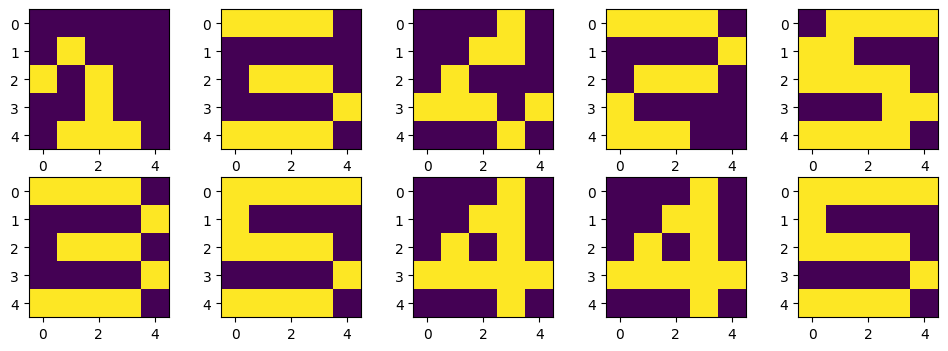

In [97]:
plt.figure(figsize=(12, 4))

for n in range(5):
    plt.subplot(2, 5, n+1)
    plt.imshow(X_test[:,:,n])
    plt.subplot(2, 5, n+6)
    plt.imshow(X[:,:, learning_result[n][0]-1])
    
plt.show()